
# Forecasting UK Solid Fuel CO₂ Emissions: A Time Series Analysis

## Introduction

Understanding and forecasting carbon emissions are critical in the global effort to address climate change. Among various sources of carbon dioxide (CO₂) emissions, **solid fuel consumption**—primarily coal—has historically been one of the largest contributors, especially in industrialized nations. In this project, we focus on the **United Kingdom's solid fuel CO₂ emissions** data, sourced from the **Carbon Dioxide Information Analysis Center (CDIAC)**. The dataset records annual CO₂ emissions from solid fuel consumption in the UK, spanning from **1751 to 2014**. This extensive historical range allows for an in-depth analysis of emissions trends, from the rise of coal use during the Industrial Revolution to the eventual decline as the UK transitioned toward cleaner energy sources.

## Problem Statement

Our goal is to forecast the future trend of CO₂ emissions from solid fuels in the UK. By applying time series analysis techniques, we aim to extract meaningful patterns and provide an accurate forecast model. The insights gained can serve as a foundation for **environmental policy planning**, helping to anticipate and mitigate the long-term effects of solid fuel consumption on climate change. Accurate forecasting of emissions is essential for setting effective reduction targets and monitoring progress toward national and international sustainability goals.

## Project Objectives

1. **Data Exploration and Visualization**: Conduct a comprehensive analysis of the dataset to uncover historical trends, seasonality, and patterns in CO₂ emissions.
2. **Time Series Decomposition and Transformations**: Break down the time series into trend, seasonal, and residual components, applying transformations if needed to stabilize the series for accurate forecasting.
3. **Modeling and Forecasting**: Implement and evaluate various forecasting models, including Naive, Simple Exponential Smoothing (SES), and Holt's Linear Trend models, to identify the model best suited for our data.
4. **Residual Analysis and Model Validation**: Analyze residuals to confirm the model’s effectiveness and ensure that no significant patterns remain unaccounted for.
5. **Conclusion and Practical Implications**: Summarize findings, interpret forecast results, and discuss the practical implications for policy and environmental planning.

This project will demonstrate how historical data can be leveraged to predict future emissions trends, aiding in climate-conscious decision-making and resource management.


## Data Exploration and Visualization

## Data Discussion

Upon exploring the dataset, We observed that each country's solid fuel CO₂ emissions are recorded annually from **1751 to 2014**. Among the countries included, the **United Kingdom (UK)** is one of the few with data spanning the entire time range, making it ideal for a thorough historical analysis and accurate long-term forecasting. 

The UK's emissions data is particularly significant due to its consistent and uninterrupted record, allowing us to observe trends over major historical events, such as the Industrial Revolution and the shift toward cleaner energy in recent decades. This continuity and historical significance make the UK an excellent choice for our study.

In this project, we focus on forecasting UK solid fuel emissions to gain insights into historical trends and provide a reliable basis for future planning in environmental policy and sustainability efforts.


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

# Load the dataset
df = pd.read_csv('fossil-fuel-co2-emissions-by-nation.csv')  # Replace with your actual file path

# Filter the data for United Kingdom and select only the solid fuel emissions
uk_data = df[df['Country'] == 'UNITED KINGDOM'].copy()
uk_solid_fuel = uk_data[['Year', 'Solid Fuel']].set_index('Year')  # Setting 'Year' as the index for time series

# Display the first few rows
uk_solid_fuel.head()


,Solid Fuel
Year,
1751,2552
1752,2553
1753,2553
1754,2554
1755,2555


In [5]:
# Checking for missing values 
uk_solid_fuel.isnull().sum()

Solid Fuel    0
dtype: int64

we found no null values so lets move on to visualization step

## Visualization

To better understand the behavior of solid fuel CO₂ emissions in the UK, we start by visualizing the data to observe overall trends and patterns. 

- **Time Series Plot**: Provides an overview of changes in emissions over time, highlighting major increases, peaks, or declines.
- **ACF (Autocorrelation) and PACF (Partial Autocorrelation) Plots**: Used to identify autocorrelation within the data, which can inform our choice of forecasting models.

These visualizations will help us identify:
- **Trend**: Long-term increase or decrease in emissions.
- **Seasonality**: Potential yearly patterns or cycles, although we expect limited seasonality given the annual data.
- **Stationarity**: Assessing if the mean and variance are stable over time, which impacts model choice.

#### Visualizations


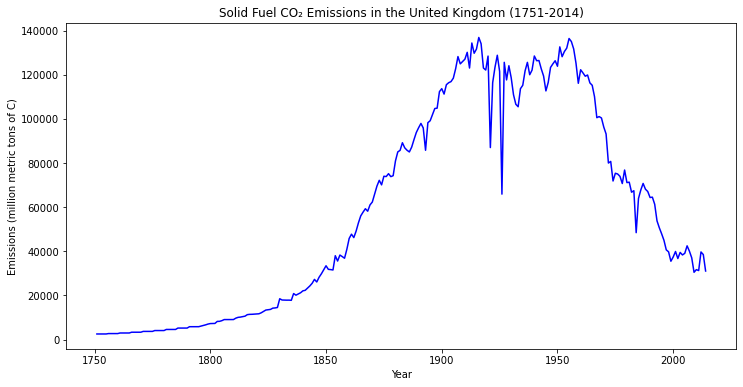

In [6]:
# Plot the original solid fuel emissions data to observe trends
plt.figure(figsize=(12, 6))
plt.plot(uk_solid_fuel.index, uk_solid_fuel['Solid Fuel'], color='blue')
plt.title('Solid Fuel CO₂ Emissions in the United Kingdom (1751-2014)')
plt.xlabel('Year')
plt.ylabel('Emissions (million metric tons of C)')
plt.show()


The plot shows a clear upward trend in solid fuel CO₂ emissions in the UK from the 18th century, peaking in the mid-20th century, followed by a gradual decline. This trend captures the impact of industrial growth, with emissions eventually decreasing as cleaner energy sources gained traction.

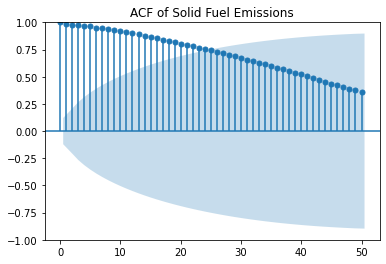

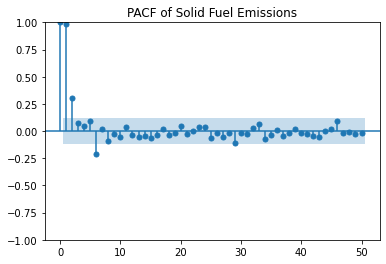

In [7]:
# ACF Plot to identify autocorrelation patterns
plot_acf(uk_solid_fuel['Solid Fuel'], lags=50)
plt.title('ACF of Solid Fuel Emissions')
plt.show()

# PACF Plot to understand partial autocorrelation
plot_pacf(uk_solid_fuel['Solid Fuel'], lags=50)
plt.title('PACF of Solid Fuel Emissions')
plt.show()


ACF Plot:
The ACF plot reveals high positive autocorrelation at lower lags, which slowly declines. This pattern suggests a strong trend in the data, as each year’s emissions are highly correlated with previous years.

PACF Plot:
The PACF plot indicates a strong correlation with the first lag, tapering off quickly. This confirms that most of the data's autocorrelation can be explained by immediate past values, making it ideal for trend-focused models like Holt’s Linear Trend.

## Transformation and Decomposition

To prepare the data for accurate forecasting, we first assess if transformations are necessary. We’ll apply a **Box-Cox transformation** to stabilize any variance, making the series closer to stationary. Then, we perform **time series decomposition** to separate the emissions data into three components:

1. **Trend**: Long-term movement or direction in emissions.
2. **Seasonal**: Any repeating patterns or cycles.
3. **Residual**: Remaining variations after removing the trend and seasonality.

These transformations and decompositions help us understand the underlying structure of the data, making it easier to select appropriate forecasting models.


### BoX - COx

The Box-Cox transformation stabilizes the variance, making the fluctuations more consistent over time.
This transformed data is now more stationary in terms of variance, which can improve model performance in forecasting.
Interpretation:
The Box-Cox transformation is appropriate here because it successfully stabilizes the variance, reducing the impact of large fluctuations in the peak periods. This transformed data will likely lead to more reliable forecasts as it better meets the assumptions of many time series models.

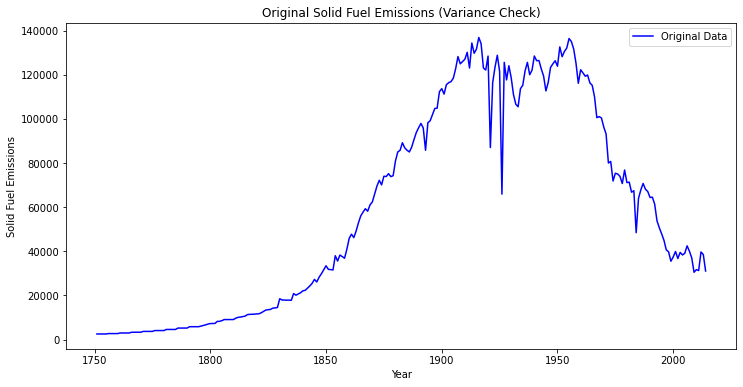

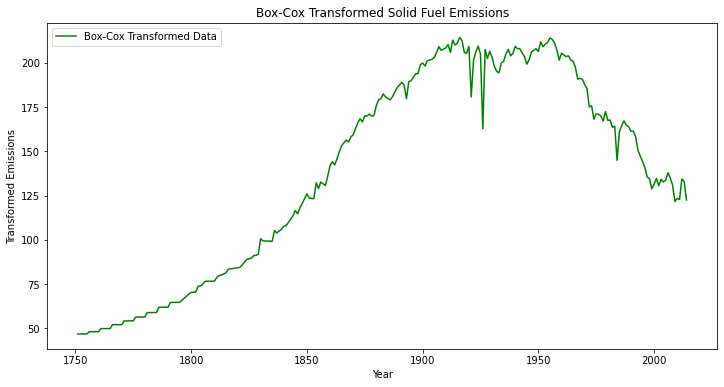

Box-Cox Lambda: 0.3710476259362658


In [8]:
from scipy.stats import boxcox
import numpy as np

# Plot original data to visually check for non-constant variance
plt.figure(figsize=(12, 6))
plt.plot(uk_solid_fuel.index, uk_solid_fuel['Solid Fuel'], label='Original Data', color='blue')
plt.title('Original Solid Fuel Emissions (Variance Check)')
plt.xlabel('Year')
plt.ylabel('Solid Fuel Emissions')
plt.legend()
plt.show()

# Apply Box-Cox Transformation if needed (only if data has positive values)
if (uk_solid_fuel['Solid Fuel'] > 0).all():  #  As Box-Cox requires positive values
    transformed_data, lambda_value = boxcox(uk_solid_fuel['Solid Fuel'])
    uk_solid_fuel['Transformed'] = transformed_data

    # Plot transformed data
    plt.figure(figsize=(12, 6))
    plt.plot(uk_solid_fuel.index, uk_solid_fuel['Transformed'], label='Box-Cox Transformed Data', color='green')
    plt.title('Box-Cox Transformed Solid Fuel Emissions')
    plt.xlabel('Year')
    plt.ylabel('Transformed Emissions')
    plt.legend()
    plt.show()

    print(f"Box-Cox Lambda: {lambda_value}")
else:
    print("Box-Cox transformation is skipped as data contains non-positive values.")


### Comparison and Insights

1. **Original Data**:
   - The original plot of solid fuel CO₂ emissions shows a clear upward trend, peaking around the mid-20th century, followed by a decline. However, there is high variance in emissions, especially during the peak period, which could complicate forecasting.

2. **Box-Cox Transformed Data**:
   - After applying the Box-Cox transformation, the emissions data displays a similar trend but with stabilized variance, particularly in the peak region. This transformation makes the data more stationary and suitable for time series modeling, as it reduces the influence of large fluctuations.

### Key Insight
The transformation effectively stabilizes the variance without altering the overall trend, allowing for more accurate and reliable modeling in the subsequent analysis.


## Decomposition

To better understand the underlying structure of the emissions data, we perform a **time series decomposition**. This process separates the data into three main components:

1. **Trend**: The long-term direction of emissions over the years.
2. **Seasonality**: Any repeating cycles or patterns, though minimal seasonal influence is expected due to the annual frequency of the data.
3. **Residual**: The remaining variation after accounting for trend and seasonality, representing random noise.

Decomposition helps reveal the dominant trend in the data, which is crucial for selecting appropriate forecasting models.


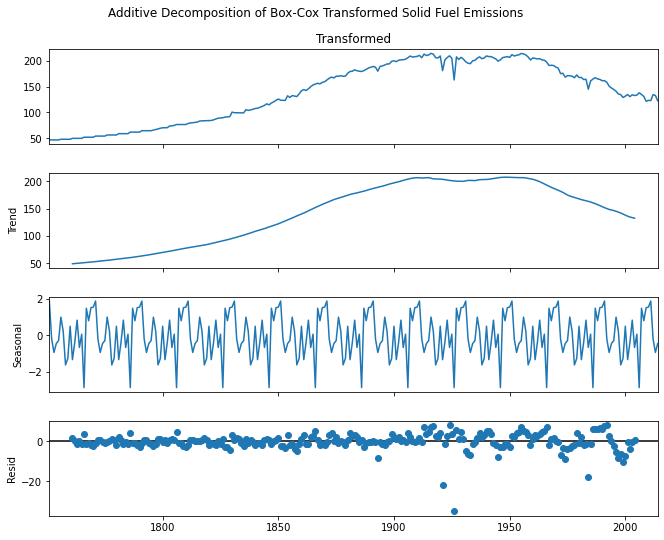

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the Box-Cox transformed data with a 20-year period for trend visibility
decomposition = seasonal_decompose(uk_solid_fuel['Transformed'], model='additive', period=20)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.suptitle('Additive Decomposition of Box-Cox Transformed Solid Fuel Emissions')
plt.show()


### Decomposition Results

1. **Trend**: The trend component shows a clear long-term increase in emissions, peaking around the mid-20th century, and then steadily declining. This trend reflects the UK's industrialization period followed by a gradual shift toward cleaner energy sources.

2. **Seasonality**: The seasonal component exhibits small, regular fluctuations. Given the annual frequency of our data, these cycles likely reflect minor year-to-year variations rather than strong seasonality.

3. **Residual**: The residuals show random noise centered around zero, indicating that the decomposition has effectively captured the systematic components (trend and seasonality). The residuals also suggest that most variation is explained by the trend.

This decomposition confirms that the data is trend-dominated, supporting our decision to use trend-focused models in the upcoming forecasting steps.


## Forecasting and Analysis

With the data prepared and decomposed, we are ready to forecast future CO₂ emissions using three models:
1. **Naive Forecast**: Uses the last observed value as the forecast for all future periods. This simple method serves as a baseline.
2. **Simple Exponential Smoothing (SES)**: Smooths the data by emphasizing recent observations, useful for short-term forecasts without trend adjustments.
3. **Holt’s Linear Trend Model**: Accounts for both level and trend, making it suitable for our trend-dominated data.

We will compare the performance of each model using **Mean Squared Error (MSE)** on the test data to determine the most accurate approach.


##### Train - Test Split

In [10]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Use the transformed data for modeling
transformed_data = uk_solid_fuel['Transformed']

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(transformed_data) * 0.8)
train, test = transformed_data.iloc[:train_size], transformed_data.iloc[train_size:]


##### Naive Forecast

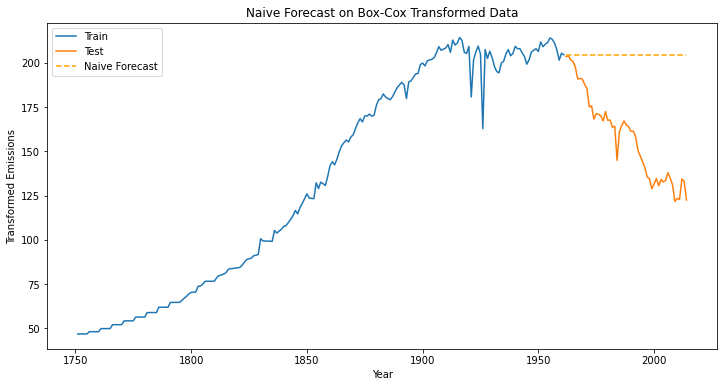

Naive Forecast MSE: 2740.8416138223183


In [11]:
# Naive Forecast using the last observed value
naive_forecast = np.repeat(train.iloc[-1], len(test))

# Plot Naive Forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, naive_forecast, label='Naive Forecast', linestyle='--', color='orange')
plt.title('Naive Forecast on Box-Cox Transformed Data')
plt.xlabel('Year')
plt.ylabel('Transformed Emissions')
plt.legend()
plt.show()

# Calculate MSE for Naive Forecast
naive_mse = mean_squared_error(test, naive_forecast)
print(f'Naive Forecast MSE: {naive_mse}')


In this case, the flat line suggests that it cannot capture the observed downward trend in emissions, leading to higher forecast errors.


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


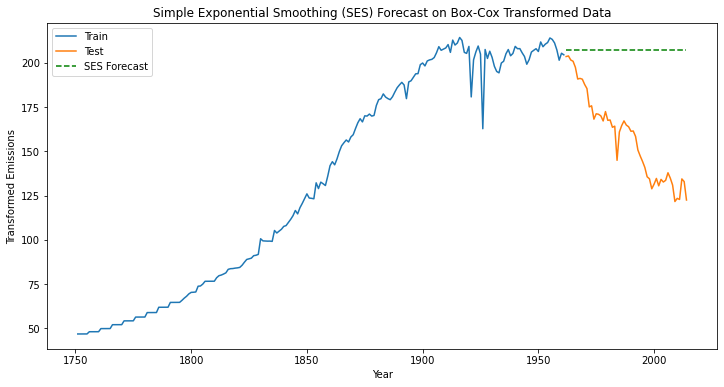

Simple Exponential Smoothing (SES) MSE: 2980.7334311361


In [12]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# SES Model
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=0.2, optimized=False)
ses_forecast = ses_model.forecast(len(test))

# Plot SES Forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, ses_forecast, label='SES Forecast', linestyle='--', color='green')
plt.title('Simple Exponential Smoothing (SES) Forecast on Box-Cox Transformed Data')
plt.xlabel('Year')
plt.ylabel('Transformed Emissions')
plt.legend()
plt.show()

# Calculate MSE for SES
ses_mse = mean_squared_error(test, ses_forecast)
print(f'Simple Exponential Smoothing (SES) MSE: {ses_mse}')


the SES forecast is also flat, similar to the Naive method. This approach might work for short-term predictions with stable data, but it is less effective for our trend-dominated emissions data. Like the Naive model, it does not capture the observed decline in emissions.


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


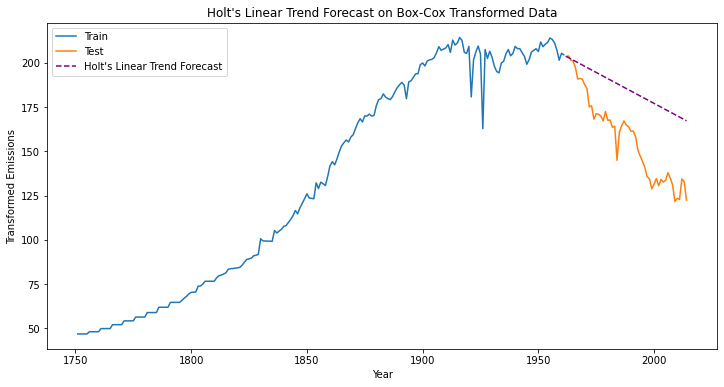

Holt's Linear Trend MSE: 951.02627758482


In [13]:
from statsmodels.tsa.holtwinters import Holt

# Holt's Linear Trend Model
holt_model = Holt(train).fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
holt_forecast = holt_model.forecast(len(test))

# Plot Holt's Linear Trend Forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, holt_forecast, label="Holt's Linear Trend Forecast", linestyle='--', color='purple')
plt.title("Holt's Linear Trend Forecast on Box-Cox Transformed Data")
plt.xlabel("Year")
plt.ylabel("Transformed Emissions")
plt.legend()
plt.show()

# Calculate MSE for Holt's Linear Trend Model
holt_mse = mean_squared_error(test, holt_forecast)
print(f"Holt's Linear Trend MSE: {holt_mse}")


Holt's model provides a declining forecast, aligning more closely with the actual downward trend in emissions. This results in a lower forecast error, as indicated by its MSE, making it the best-performing model among the three for predicting future emissions.


In [14]:
print("Model Comparison Summary:")
print(f"Naive Forecast MSE: {naive_mse}")
print(f"Simple Exponential Smoothing (SES) MSE: {ses_mse}")
print(f"Holt's Linear Trend MSE: {holt_mse}")


Model Comparison Summary:
Naive Forecast MSE: 2740.8416138223183
Simple Exponential Smoothing (SES) MSE: 2980.7334311361
Holt's Linear Trend MSE: 951.02627758482


### Interpretation of Forecasting Results

1. **Naive Forecast**:
   - The Naive Forecast uses the last observed value in the training data to predict future values, resulting in a flat forecast line for the test period.
   - **MSE**: 2740.84, which serves as a baseline for comparing other models.

2. **Simple Exponential Smoothing (SES)**:
   - SES also produces a flat forecast line similar to the Naive method, as it does not account for trends. This approach may be useful for short-term predictions but is less effective for our trend-dominated data.
   - **MSE**: 2980.73, slightly higher than the Naive model, indicating that SES is not the best fit for this dataset.

3. **Holt’s Linear Trend Model**:
   - Holt’s Linear Trend Model, which captures both level and trend, provides a declining forecast that aligns more closely with the observed downward trend in the test data.
   - **MSE**: 951.03, the lowest among the models tested, indicating it provides the most accurate forecasts for our data.



### Conclusion
The **Holt's Linear Trend Model** is the best-performing model, as shown by its significantly lower MSE compared to the Naive and SES models. This model effectively captures the downward trend in the transformed data, making it suitable for forecasting future solid fuel emissions in the UK. 

This insight supports using trend-aware models like Holt’s Linear Trend for data with strong historical trends, providing a more reliable basis for long-term emissions forecasting and policy planning.
